In [4]:
%matplotlib inline

# CMPS 140

# Assignment 4

**Due July 21, 2019 11:59**

In [5]:
NAME = "Derrick DeBose"

## Problem 1

Write down the factored conditional probability expression that corresponds
to the graphical Bayesian Network shown bellow:

![bn1](https://alliance.seas.upenn.edu/~cis520/dynamic/2018/wiki/uploads/Lectures/example_trails_bn_small.png)


### Answer:

P(A,G,H,B,I,J,F,E,C,D) = P(A) * P(G) * P(H|A,G) * P(B|A) * P(I|H) * P(J|G) * P(F|G) * P(E|F) * P(C|B) * P(D|E,C)


## Problem 2

Given the following Bayesian Network, find the joint probability.  Write out the product of probabilities and conditional probabilites that lead to your numeric answer as well as reporting your numeric answer.

![bn2](https://drive.google.com/uc?id=1TKufu8R4QmgAY2hL3dN8BK6m6jif8L2k)

#### 2(a) $~~~$ P(Cloudy, Sprinkler, Rain, Wet_Grass) = P(C) * P(S|C) * P(R|C) * P(WG|R,S)

0.5 * 0.1 * 0.8 * 0.99 = .0396


#### 2(b) $~~~$  P(Cloudy, not Sprinkler, Rain, Wet_Grass) = P(C) * P(-S|C) * P(R|C) * P(WG|R,-S)

0.5 * 0.9 * 0.8 * 0.9 = .324

#### 2(c)  $~~~$   If 2(a) < 2(b), why?  $~~~$  OR $~~~$  If 2(a) > 2(b), why?

2b has a higher probabilty of happening because there is a small probabilty of the sprinklers coming on given that there is cloudy weather.

### Logistic Regression ###

**Refer to the following derivation of the gradient when implementing logistic regression in problem 3 below.**

For this assignment we'll use the sum of squared error, and gradient descent. Suppose our dataset consists of $n$ records, each with $m$ features:

$$X =
\begin{bmatrix}
    x_{01}       & x_{02} & \cdots & x_{0m} \\
    x_{11}       & x_{12} & \cdots & x_{1m} \\
    \vdots       & \vdots & \ddots & \vdots \\
    x_{n-1,1}       & x_{n-1,2} & \cdots & x_{n-1,m}
\end{bmatrix}$$

One way to include a bias is to augment $X$ with a column of ones:

$$X =
\begin{bmatrix}
    1 & x_{01}       & x_{02} & \cdots & x_{0m} \\
    1 & x_{11}       & x_{12} & \cdots & x_{1m} \\
    \vdots  & \vdots & \vdots & \ddots & \vdots \\
    1 & x_{n-1,1}       & x_{n-1,2} & \cdots & x_{n-1,m}
\end{bmatrix}$$

We also have $n$ labels corresponding to the correct classification of each of the above records, $y=[y_0,y_1,\cdots ,y_{n-1}]^T$, i.e.:

$$y =
\begin{bmatrix}
    y_0  \\
    y_1  \\
    \vdots   \\
    y_{n-1} 
\end{bmatrix}$$

We will try to find the optimal parameter values $w = [w_0, w_1, \cdots, w_m]^T$ of our logistic regression model, where $w_0$ is the bias weight. To simplify our notation, let
 
$$z = X w^T =
\begin{bmatrix}
    X_{00}w_0 + X_{01}w_1 + \cdots + X_{0m}w_m  \\
    X_{10}w_0 + X_{11}w_1 + \cdots + X_{1m}w_m  \\
    \vdots   \\
    X_{n-1,0}w_0 + X_{n-1,1}w_1 + \cdots + X_{n-1,m}w_m 
\end{bmatrix} =
\begin{bmatrix}
    z_0  \\
    z_2  \\
    \vdots   \\
    z_{n-1}
\end{bmatrix}$$

We seek $w$ such that the sum of squared error is minimized (the 1/2 factor makes the derivation easier):

$$\text{SSE} = \frac{1}{2} \sum_{i=0}^{n-1} (y_i - h_i)^2$$

Since the above is a convex function, it has a unique minimum value. Taking the derivative with respect to $w_i$, we get:

$$\frac{d}{dw_j}\text{SSE} = \frac{1}{2} \sum_{i=0}^{n-1} \frac{d}{dw_j}(y_i - \sigma(z_i))^2$$

$$\quad \quad \quad \quad= \sum_{i=0}^{n-1} (y_i - \sigma(z_i)) \frac{d}{dw_j} (-\sigma(z_i))$$

Recall the chain rule from calculus, and that each $z_j$ is a funcion of the $w_i$, and also that $\frac{d}{dz}\sigma(z)=\sigma(z)(1-\sigma(z))$, so the above becomes:

$$\frac{d}{dw_j}\text{SSE} = -\sum_{i=0}^{n-1} (y_i - \sigma(z_i))  \sigma(z_i) (1 -  \sigma(z_i)) \frac{d}{dw_j} z_i$$

$$\quad \quad \quad= -\sum_{i=0}^{n-1} (y_i - \sigma(z_i))  \sigma(z_i) (1 -  \sigma(z_i)) x_{ij}$$

This can be written in matrix form as:
$$\nabla \text{SSE} = -X^T [(y-\sigma(z))\sigma(z)(1-\sigma(z))]$$

The expression in the brackets is computed element-wise before taking the matrix product with $X$ transpose.

We are taking a step in the opposite direction of the gradient, i.e. in the direction:

$$-\nabla \text{SSE} = X^T [(y-\sigma(z))\sigma(z)(1-\sigma(z))]$$

Letting $h = \sigma(z)$, this becomes:
$$-\nabla \text{SSE} = X^T [(y-h)h(1-h)]$$

The above expression defines an $m\times 1$ vector we use to update the $m$ weights that are the components of $w$.


#### Note: #### 
The variables within brackets above, $[(y-h)h(1-h)]$, are column vectors (i.e. arrays of size $(n,1)$), and that the operations subtraction and multiplication are done component wise. The sigmoid function $\sigma$ was also applied componentwise to obtain $h$ from $z$.

## Problem 3

Given the dataset below, implement the logistic regression algorithm, optimizing the parameters using gradient descent and squared error as the loss function. For this to go smoothly, be sure to understand what needs to be implemented in the above derivation. *Then the helper functions will almost write themselves.*

data.shape = (500, 2) ,  labels.shape = (500,)


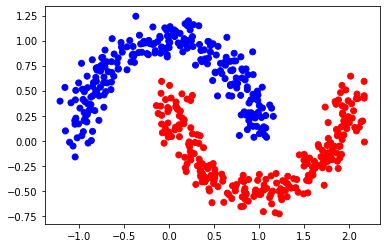

In [6]:
# The following code creates the dataset we'll be using.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

np.random.seed(42) 
data, labels = make_moons(n_samples=500, noise=0.1)
colors = ['r' if y else 'b' for y in labels]
print('data.shape =', data.shape,',  labels.shape =', labels.shape)
plt.scatter(data[:,0], data[:,1], c=colors)
plt.show()

Logistic regression has a straight line for its decision boundary. Since one can't seperate the blue and red dots with a line, a logistic regression model can't possibly perfectly distinguish blue from red dots in this dataset. Our model can't possibly achieve 100% accuracy on this data.

#### Note: ####
In completeing the functions below, note that
$$h = \sigma(z)$$
and
$$-\nabla \text{SSE} = X^T [(y-h)h(1-h)]$$

That last expression is what you're to implement for the function:

                                                   neg_grad_SSE(X, y, h)
                                                   

Also notice that $X^T$ is the transpose of matrix $X$, and that we have a matrix multiplication going on between the matrix and the column vector inside the brackets.

Intial Accuracy:  0.508
Step 1  Accuracy:  0.508
Step 2  Accuracy:  0.6819999999999999
Step 3  Accuracy:  0.772
Step 4  Accuracy:  0.786
Step 5  Accuracy:  0.802
Step 6  Accuracy:  0.8140000000000001
Step 7  Accuracy:  0.8160000000000001
Step 8  Accuracy:  0.8180000000000001
Step 9  Accuracy:  0.83
Step 10  Accuracy:  0.84
Step 11  Accuracy:  0.866
Step 12  Accuracy:  0.864
Step 13  Accuracy:  0.866
Step 14  Accuracy:  0.866
Step 15  Accuracy:  0.864
Step 16  Accuracy:  0.868
Step 17  Accuracy:  0.868
Step 18  Accuracy:  0.87
Step 19  Accuracy:  0.868
Step 20  Accuracy:  0.868
Step 21  Accuracy:  0.87
Step 22  Accuracy:  0.87
Step 23  Accuracy:  0.874
Step 24  Accuracy:  0.874
Step 25  Accuracy:  0.87
Step 26  Accuracy:  0.87
Step 27  Accuracy:  0.872
Step 28  Accuracy:  0.878
Step 29  Accuracy:  0.868
Step 30  Accuracy:  0.87
Step 31  Accuracy:  0.868
Step 32  Accuracy:  0.872
Step 33  Accuracy:  0.87
Step 34  Accuracy:  0.87
Step 35  Accuracy:  0.87
Step 36  Accuracy:  0.87
Step 37  

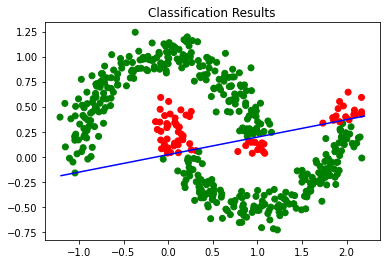

In [8]:
# Complete each of these functions.

# 3(a)
def compute_z(x, w):  # output = z = the dot product of x and w
    return x.dot(w)

# 3(b)
def sigmoid(z):  
    ### sigmoid function from slides
    return 1 / (1 + np.exp(-z))

# 3(c)
def logistic(z):
    ### logistic = sigmoid
    return 1 / (1 + np.exp(-z))

# 3(d)
def sigmoid_derivative(h):
    ### d/dz sigmoid(z) = sigmoid(z) * (1 - sigmoid(z))
    return h * (1-h)

# 3(e)
def SSE(y, h):
    ### sum of squared error
    sum_ = (y-h)**2
    sum_ = sum_.sum()
    return sum_/2

# 3(f)
def neg_grad_SSE(x, y, h):
    ### multiply the column vectors by the transpose of X
    column = (y-h)*sigmoid_derivative(h)
    return x.T.dot(column)

# 3(g)
def accuracy(y, h):
    ### number that are correct / number that are correct + wrong
    return 1 - ((abs(y-h).sum()) /len(h))
    

def logistic_regression(x, y, learning_rate, num_steps=40):
    # start with intial parameters w_i = 1
    w = np.ones((3, 1))  # a column vector
    
    # Augment x with an initial column of ones for the bias term (the zeroth column of x).
    ones = np.ones((x.shape[0], 1))
    x = np.hstack((ones, x))
    z = compute_z(x, w)
    print('Intial Accuracy: ', accuracy(y, np.round(logistic(z))))
    
    for step in range(num_steps):
        
        z = compute_z(x, w)
        h = sigmoid(z)
        
        # Calculate the negative of the gradient.
        update = neg_grad_SSE(x, y, h)
        
        # Update weights.
        w += learning_rate * update
        print('Step', step + 1, ' Accuracy: ', accuracy(y, np.round(h)))
    
    return w


ws = logistic_regression(data, labels.reshape((len(labels), 1)), 0.5)
z = compute_z(np.pad(data, [[0,0], [1,0]], mode='constant'), ws)
yh = np.round(logistic(z))

# Plot the correct classifications in green, and the classification errors in red.
colors = ['g' if _yh==_y else 'r' for _yh, _y in zip(yh, labels.astype(int))]
plt.title('Classification Results')
plt.scatter(data[:,0], data[:,1], c=colors)

coeffs = (ws.T).tolist()[0]   # the learned logistic regression coefficients
xvals = [-1.2, 2.2]

# Weirdly, plotting the decision boundary, it's vertically off by about 0.135.  This seems to be a bug
# in matplotlib, since it's off by this amount even changing the seed used to generate the data.
yvals = [-coeffs[1]/coeffs[2] * xval - coeffs[0]/coeffs[2] - 0.135 for xval  in xvals]
plt.plot([xvals[0], xvals[1]], [yvals[0], yvals[1]], 'b-')
